# Import Libraries

In [19]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

# Load Dataset

In [7]:
# Dataset path
dataset_dir = '../data/raw/pets-facial-expression-dataset'
# Class paths
angry_dir = f'{dataset_dir}/angry'
happy_dir = f'{dataset_dir}/happy'
other_dir = f'{dataset_dir}/other'
sad_dir = f'{dataset_dir}/sad'

# Summary

Number of images and classes

In [9]:
num_angry = len(os.listdir(angry_dir))
num_happy = len(os.listdir(happy_dir))
num_other = len(os.listdir(other_dir))
num_sad = len(os.listdir(sad_dir))
num_images = num_angry + num_happy + num_other + num_sad

num_classes = 4

print('Number of images: ', num_images)
print('Number of classes: ', num_classes)

Number of images:  1000
Number of classes:  4


List of classes

In [10]:
class_list = ['angry', 'happy', 'other', 'sad']
print(class_list)

['angry', 'happy', 'other', 'sad']


# Class Analysis

Distribution of class samples

Minimum number of images per class:  250
Max number of images per class:  250
Average number of images per class:  250


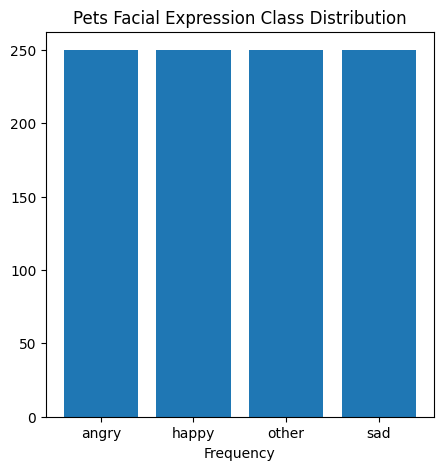

In [17]:
# Construct dictionary of class-name:image-count pairs
class_img_counts = {}

class_img_counts['angry'] = num_angry
class_img_counts['happy'] = num_happy
class_img_counts['other'] = num_other
class_img_counts['sad'] = num_sad

# Construct list of class image counts
class_img_counts_list = list(class_img_counts.values())

# Descriptive stats
print('Minimum number of images per class: ', min(class_img_counts_list))
print('Max number of images per class: ', max(class_img_counts_list))
print('Average number of images per class: ', int(sum(class_img_counts_list) / len(class_img_counts_list)))

# Plot the distribution
plt.figure(figsize=(5, 5))
plt.bar(list(class_img_counts.keys()), list(class_img_counts.values()))
plt.xlabel('Frequency')
plt.title('Distribution of Pets Facial Expression Dataset Classes')
plt.show()

# Image Analysis

Distribution of image sizes

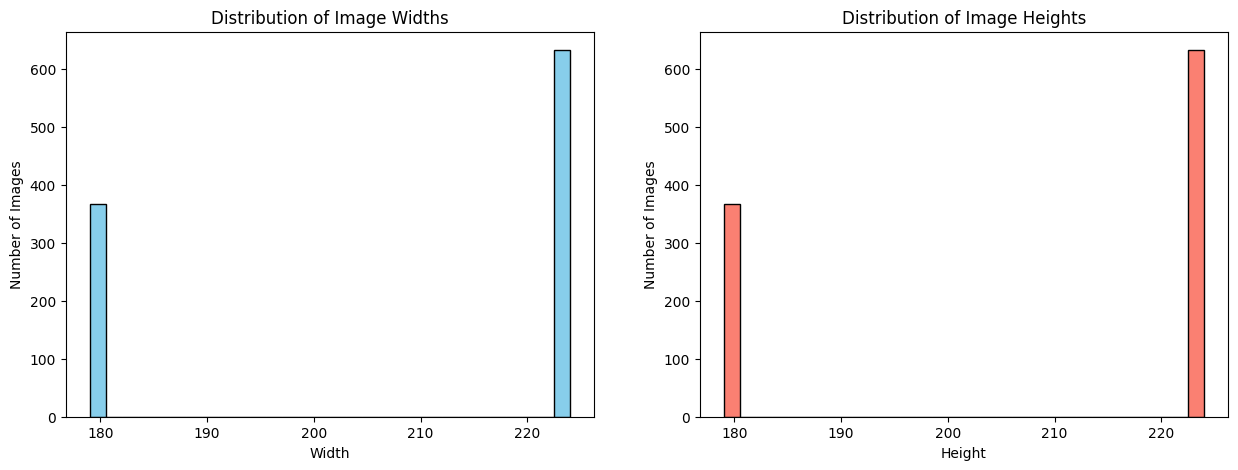

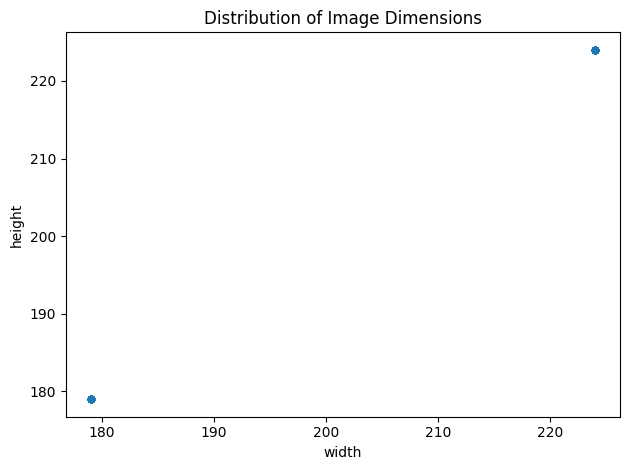

In [50]:
# Get list of all image filenames
img_files_angry = os.listdir(angry_dir)
img_files_happy = os.listdir(happy_dir)
img_files_other = os.listdir(other_dir)
img_files_sad = os.listdir(sad_dir)

# Extract dimension of all images
img_dims_angry = [Image.open(os.path.join(angry_dir, img_file)).size for img_file in img_files_angry]
img_dims_happy = [Image.open(os.path.join(happy_dir, img_file)).size for img_file in img_files_happy]
img_dims_other = [Image.open(os.path.join(other_dir, img_file)).size for img_file in img_files_other]
img_dims_sad = [Image.open(os.path.join(sad_dir, img_file)).size for img_file in img_files_sad]

# Separate widths and heights
widths = [dim[0] for dim in img_dims_angry] + [dim[0] for dim in img_dims_happy] + [dim[0] for dim in img_dims_other] + [dim[0] for dim in img_dims_sad]
heights = [dim[1] for dim in img_dims_angry] + [dim[1] for dim in img_dims_happy] + [dim[1] for dim in img_dims_other] + [dim[1] for dim in img_dims_sad]

# Create dataframe
df_img_sizes = pd.DataFrame({'width': widths, 'height': heights})

# Plotting distribution of widths and heights
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting widths
ax[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Image Widths')
ax[0].set_xlabel("Width")
ax[0].set_ylabel('Number of Images')
# Plotting heights
ax[1].hist(widths, bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Image Heights')
ax[1].set_xlabel("Height")
ax[1].set_ylabel('Number of Images')

# Scatter plot of dimensions
df_img_sizes.plot.scatter(x='width', y='height')
plt.title('Distribution of Image Dimensions')

plt.tight_layout()
plt.show()